<a href="https://colab.research.google.com/github/robinkm0610/ML_with_Python-R/blob/main/Basics/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
#Data Reshape
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
#Data normalization
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

In [ ]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=20,batch_size = 64, validation_data=(X_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 4s 4ms/step - loss: 0.3198 - accuracy: 0.8844 - val_loss: 0.3636 - val_accuracy: 0.8702
Epoch 2/20
860/860 [==============================] - 3s 4ms/step - loss: 0.3095 - accuracy: 0.8881 - val_loss: 0.3295 - val_accuracy: 0.8814
Epoch 3/20
860/860 [==============================] - 4s 5ms/step - loss: 0.3018 - accuracy: 0.8897 - val_loss: 0.6158 - val_accuracy: 0.7878
Epoch 4/20
860/860 [==============================] - 3s 4ms/step - loss: 0.2932 - accuracy: 0.8945 - val_loss: 0.3163 - val_accuracy: 0.8862
Epoch 5/20
860/860 [==============================] - 3s 4ms/step - loss: 0.2878 - accuracy: 0.8956 - val_loss: 0.2996 - val_accuracy: 0.8912
Epoch 6/20
860/860 [==============================] - 3s 4ms/step - loss: 0.2785 - accuracy: 0.8990 - val_loss: 0.2931 - val_accuracy: 0.8978
Epoch 7/20
860/860 [==============================] - 4s 5ms/step - loss: 0.2727 - accuracy: 0.9023 - val_loss: 0.3138 - val_accuracy: 0.8888
Epoch 

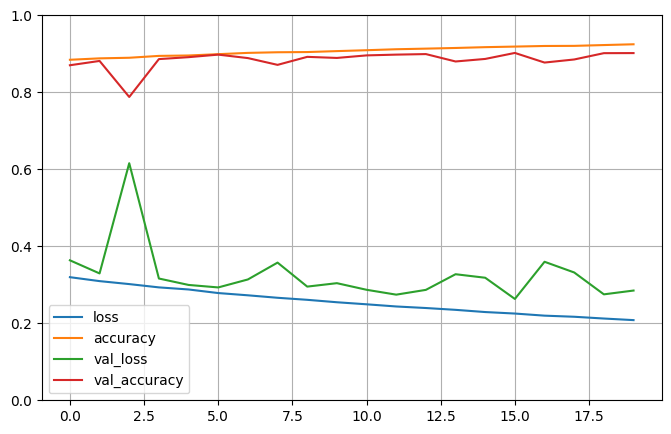

In [ ]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
ev = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2960 - accuracy: 0.8942


In [ ]:
ev

[0.2960171699523926, 0.8942000269889832]

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 132ms/step


array([[4.3410259e-05, 7.4337913e-06, 1.5066762e-05, 4.9178097e-06,
        6.5218401e-06, 2.6684033e-03, 5.0998378e-06, 2.0565171e-02,
        1.2608613e-03, 9.7542316e-01],
       [1.0668157e-04, 4.4793529e-09, 9.9840492e-01, 6.1325193e-07,
        7.2634738e-04, 7.8142648e-10, 7.6130964e-04, 2.0264387e-11,
        2.5250776e-07, 4.8859961e-10],
       [6.4159121e-07, 9.9999630e-01, 2.8132467e-09, 1.6295813e-06,
        1.3541734e-06, 2.2494526e-10, 9.5790519e-08, 3.2062630e-11,
        5.1733934e-10, 1.8041002e-10]], dtype=float32)

In [ ]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(size=(28, 28))


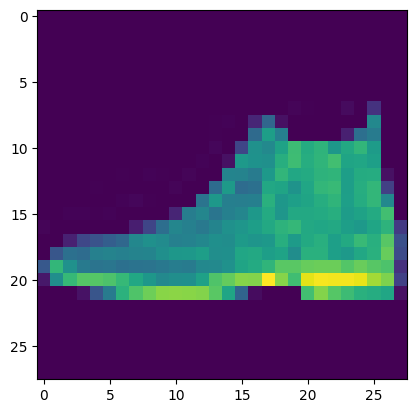

In [ ]:
print(plt.imshow(X_new[0].reshape(28,28)))

In [ ]:
keras.backend.clear_session()

In [ ]:
del model

In [ ]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D(2,2))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation='relu'))
model_a.add(keras.layers.Dense(100, activation='relu'))
model_a.add(keras.layers.Dense(10, activation='softmax'))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation='relu'))
model_b.add(keras.layers.Dense(100, activation='relu'))
model_b.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model_a.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_b.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [ ]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 flatten_1 (Flatten)         (None, 43264)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               12979500  
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 13011250 (49.63 MB)
Trainable params: 13011250 (49.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_history_a = model_a.fit(X_train, y_train, epochs=20,batch_size = 64, validation_data=(X_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 5s 4ms/step - loss: 0.8550 - accuracy: 0.7017 - val_loss: 0.7421 - val_accuracy: 0.7376
Epoch 2/20
860/860 [==============================] - 3s 4ms/step - loss: 0.5341 - accuracy: 0.8057 - val_loss: 0.4894 - val_accuracy: 0.8158
Epoch 3/20
860/860 [==============================] - 3s 4ms/step - loss: 0.4793 - accuracy: 0.8264 - val_loss: 0.9895 - val_accuracy: 0.6946
Epoch 4/20
860/860 [==============================] - 4s 5ms/step - loss: 0.4415 - accuracy: 0.8432 - val_loss: 0.4054 - val_accuracy: 0.8616
Epoch 5/20
860/860 [==============================] - 3s 4ms/step - loss: 0.4167 - accuracy: 0.8506 - val_loss: 0.4238 - val_accuracy: 0.8524
Epoch 6/20
860/860 [==============================] - 3s 4ms/step - loss: 0.3924 - accuracy: 0.8598 - val_loss: 0.3657 - val_accuracy: 0.8734
Epoch 7/20
860/860 [==============================] - 3s 4ms/step - loss: 0.3747 - accuracy: 0.8667 - val_loss: 0.4117 - val_accuracy: 0.8580
Epoch 

In [ ]:
model_history_b = model_b.fit(X_train, y_train, epochs=20,batch_size = 64, validation_data=(X_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 7s 7ms/step - loss: 0.7113 - accuracy: 0.7519 - val_loss: 0.6899 - val_accuracy: 0.7522
Epoch 2/20
860/860 [==============================] - 6s 6ms/step - loss: 0.4836 - accuracy: 0.8251 - val_loss: 0.4760 - val_accuracy: 0.8132
Epoch 3/20
860/860 [==============================] - 5s 6ms/step - loss: 0.4347 - accuracy: 0.8423 - val_loss: 0.9714 - val_accuracy: 0.6984
Epoch 4/20
860/860 [==============================] - 5s 6ms/step - loss: 0.4051 - accuracy: 0.8541 - val_loss: 0.3890 - val_accuracy: 0.8634
Epoch 5/20
860/860 [==============================] - 6s 7ms/step - loss: 0.3855 - accuracy: 0.8612 - val_loss: 0.3817 - val_accuracy: 0.8626
Epoch 6/20
860/860 [==============================] - 5s 6ms/step - loss: 0.3657 - accuracy: 0.8664 - val_loss: 0.3576 - val_accuracy: 0.8736
Epoch 7/20
860/860 [==============================] - 6s 7ms/step - loss: 0.3518 - accuracy: 0.8716 - val_loss: 0.3812 - val_accuracy: 0.8662
Epoch 

In [ ]:
model_history_a.history

{'loss': [0.8550171852111816,
  0.5340949296951294,
  0.47925451397895813,
  0.4415024220943451,
  0.4167311191558838,
  0.39236533641815186,
  0.3747188150882721,
  0.35975906252861023,
  0.34620341658592224,
  0.3347194194793701,
  0.3228054344654083,
  0.3125780522823334,
  0.3057144582271576,
  0.2968098819255829,
  0.28943920135498047,
  0.28375256061553955,
  0.27652478218078613,
  0.27091774344444275,
  0.26472997665405273,
  0.2596780061721802],
 'accuracy': [0.7016909122467041,
  0.8056908845901489,
  0.8264363408088684,
  0.8431817889213562,
  0.8506181836128235,
  0.859781801700592,
  0.8666727542877197,
  0.8716182112693787,
  0.8739091157913208,
  0.8792726993560791,
  0.8822363615036011,
  0.8865636587142944,
  0.8889272809028625,
  0.89201819896698,
  0.8946545720100403,
  0.8972363471984863,
  0.8996182084083557,
  0.9007999897003174,
  0.9039999842643738,
  0.9050182104110718],
 'val_loss': [0.7420786619186401,
  0.48936727643013,
  0.9895431399345398,
  0.405411392450

In [ ]:
model_history_b.history

{'loss': [0.7113305330276489,
  0.48355013132095337,
  0.43473100662231445,
  0.4051242470741272,
  0.38545653223991394,
  0.3657003343105316,
  0.3517710566520691,
  0.33939769864082336,
  0.32850873470306396,
  0.3191726505756378,
  0.308694988489151,
  0.2991127371788025,
  0.2924363613128662,
  0.2852461040019989,
  0.27728593349456787,
  0.27168986201286316,
  0.2635093927383423,
  0.2576046288013458,
  0.2520011067390442,
  0.2455509603023529],
 'accuracy': [0.7518908977508545,
  0.8251454830169678,
  0.8423454761505127,
  0.8540909290313721,
  0.8611999750137329,
  0.8663636445999146,
  0.8716182112693787,
  0.8769999742507935,
  0.8797818422317505,
  0.8832908868789673,
  0.8870000243186951,
  0.8903636336326599,
  0.8923636078834534,
  0.8951454758644104,
  0.897599995136261,
  0.9008363485336304,
  0.9036545157432556,
  0.9048908948898315,
  0.9070000052452087,
  0.9096545577049255],
 'val_loss': [0.6899253129959106,
  0.476028710603714,
  0.9713773727416992,
  0.389032512903

#Dog Cat Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')